# 1.5 初めての（簡単な）機械学習アプリケーション

## 1.5.1 データを読み込む

In [1]:
import numpy as np
import scipy as sp
import os, sys

## 1.5.2 前処理とデータ整形

In [2]:
data_dir = os.path.join(
    os.path.dirname(os.path.realpath("__file__")), "ch01", "data")
data = sp.genfromtxt(os.path.join(data_dir, "web_traffic.tsv"), delimiter="\t")
print(data[:10])
print(data.shape)

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00   1.65600000e+03]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]
(743, 2)


## 1.5.2 前処理とデータ整形

In [3]:
x = data[:, 0]
y = data[:, 1]

print("x: ", x)
print("y: ", y)

x:  [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.  108.
  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.  120.
  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.  144.
  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.  156.
  157.  158.  159.  160.  161.  162.  163.  164

**不適切な値を取り除く

In [4]:
# NANの数
sp.sum(sp.isnan(y))

0

In [5]:
# yの値がNANであるカラムを取り除く
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

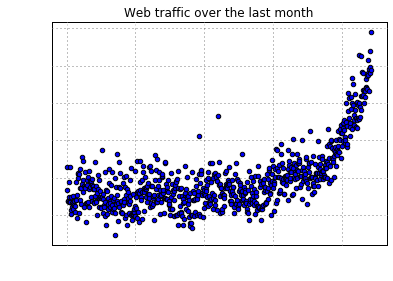

In [6]:
# matplotlib で描画
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(colors='white')

plt.scatter(x, y)
plt.title("Web traffic over the last month")
plt.xlabel("Time", color="white")
plt.ylabel("Hits/hour", color="white")
plt.xticks([w * 7 * 24 for w in range(5)], ['week %i' % w for w in range(5)])
plt.autoscale(tight=True)

plt.grid()
plt.show()

## 誤差関数

In [7]:
def error(f, x, y):
  return (sp.sum(f(x) - y) ** 2)

## 単純な直線で近似する
SciPyの polyfit()  を使う。x, y と多項式の次元（直線の場合は1）を指定すると誤差を最小とするモデル関数を得ることができる

In [8]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)
print(fp1[0])
print(fp1[1])
print("rediduals : ", residuals)

Model parameters: [    2.57152281  1002.10684085]
2.57152280514
1002.10684085
rediduals :  [  3.19874315e+08]


誤差を最小とするモデル関数

1.07202607387e-19


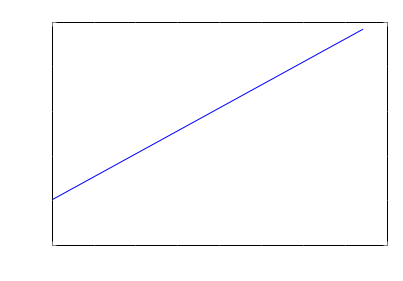

In [9]:
def error_minimize(a, b, x):
  return a * x + b

f1 = sp.poly1d(fp1)
print(error(f1, x, y))
yy = error_minimize(fp1[0], fp1[1], x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(colors="white")
plt.plot(x, yy)
plt.xlim(0, 800)
plt.ylim(500, 3000)
plt.xlabel("x", color="white")
plt.ylabel("yy", color="white")
plt.title("Minimize Error Function", color="white")
plt.show()

また、poly1d() を用いることで、モデルパラメータからモデル関数を作ることができる

In [10]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

1.07202607387e-19


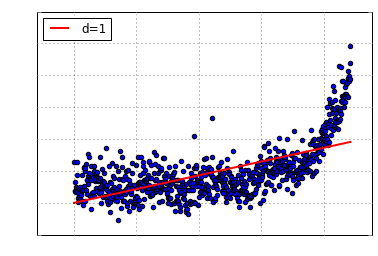

In [11]:
fx = sp.linspace(0, x[-1], 1000) # プロット用に "x値" を生成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(colors="white")
plt.plot(fx, f1(fx), linewidth=2, color="red")
plt.scatter(x, y)
plt.grid(True)
plt.xticks([w * 7 * 24 for w in range(5)], ['week %i' % w for w in range(5)])
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

## より進んだやり方へ

In [12]:
f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

[  1.04688184e-02  -5.21727812e+00   1.96921629e+03]
3.04931861012e-20


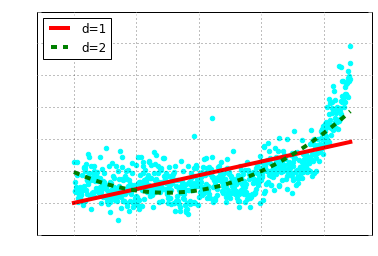

In [13]:
fx = sp.linspace(0, x[-1], 1000)  # プロット用に "x値" を生成
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(colors="white")
plt.plot(fx, f1(fx), linewidth=4, color="red")
plt.plot(fx, f2(fx), "--", linewidth=4, color="green")
plt.scatter(x, y, color="cyan")
plt.grid(True)
plt.xticks([w * 7 * 24 for w in range(5)], ['week %i' % w for w in range(5)])
plt.legend(["d=%i" % f1.order, "d=%i" % f2.order], loc="upper left")
plt.show()

## データを違う視点から眺める

In [14]:
inflection = 3.5 * 7 * 24
xa = x[:inflection]  # 変化点前のデータポイント
ya = y[:inflection]

xb = x[inflection:]  # 変化点後のデータポイント
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)

print("Error inflection %f" % (fa_error + fb_error))

Error inflection 0.000000


/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


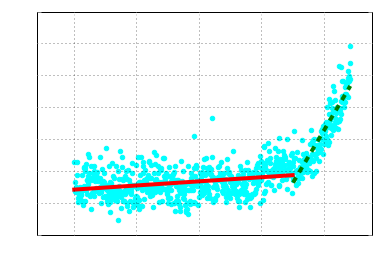

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.tick_params(colors="white")
plt.plot(xa, fa(xa), linewidth=4, color="red")
plt.plot(xb, fb(xb), "--", linewidth=4, color="green")
plt.scatter(x, y, color="cyan")
plt.grid(True)
plt.xticks([w * 7 * 24 for w in range(5)], ['week %i' % w for w in range(5)])
plt.show()

## 訓練データとテストデータ

In [16]:
frac = 0.3  # テストに用いるデータの割合
split_idx = int(frac * len(xb))

shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])  # テスト用データインデックス配列(30%)
train = sorted(shuffled[split_idx:])  # 訓練用データ(70%)

# それぞれ訓練データを用いて訓練を行う
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
  print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Error d=1: 361893.350538
Error d=2: 6678400.192476
Error d=3: 6273873.517638
Error d=10: 7455576.920017
Error d=53: 6973075.745731


/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/kikuchishota/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [17]:
print(fbt2)

        2
0.1166 x - 135.6 x + 4.156e+04


In [19]:
print(fbt2-100000)

        2
0.1166 x - 135.6 x - 5.844e+04


In [22]:
from scipy.optimize import fsolve

reached_max = fsolve(fbt2 - 100000, 1700) / (7 * 24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 8.916621
